In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Load the dataset
dataset = 'Asset15k.xlsx'
df = pd.read_excel(dataset)
X = df.iloc[:, 1:-2]
y = df['AssetType']

In [3]:
X.head()

,SerialNo,Manufacturer,ModelNbr
0,NaN,NaN,NaN
1,TBA,NaN,TBA
2,TBA,NaN,TBA
3,NaN,NaN,NaN
4,TBA,NaN,TBA


In [4]:
special_values = [1234, 'UNKOWN', 'Unknown', 'NA', 'NULL', 'UNKNOWN', 'TBA', 'N/A', 'NOT VISIBLE', '123TEST', 'UNABLE TO LOCATE', 'NO ID', 'NO ACCESS', 'UNKOWN', 'NaN', 'na', 'AS PER PICS']

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
X_copy = X.copy()

# Replace values using .loc to avoid SettingWithCopyWarning
X_copy.loc[:, 'SerialNo'] = X_copy['SerialNo'].replace(special_values, pd.NA)
X_copy.loc[:, 'Manufacturer'] = X_copy['Manufacturer'].replace(special_values, pd.NA)
X_copy.loc[:, 'ModelNbr'] = X_copy['ModelNbr'].replace(special_values, pd.NA)

In [5]:
X = X_copy
X.head()

,SerialNo,Manufacturer,ModelNbr
0,NaN,NaN,NaN
1,<NA>,NaN,<NA>
2,<NA>,NaN,<NA>
3,NaN,NaN,NaN
4,<NA>,NaN,<NA>


In [6]:
missing_values_count = X.isna().sum()

# Display the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
SerialNo        7222
Manufacturer    2806
ModelNbr        4447
dtype: int64


In [7]:
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X.loc[:, column] = label_encoder.fit_transform(X[column].astype(str))

y = label_encoder.fit_transform(y.astype(str))

In [8]:
# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

C:\ML\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [9]:
missing_values_count = X.isna().sum()

# Display the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
SerialNo        0
Manufacturer    0
ModelNbr        0
dtype: int64


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [12]:
# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [13]:
# Fit and apply the oversampling to the training set
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [14]:
y_series = pd.Series(y_train_resampled)
class_distribution = y_series.value_counts()

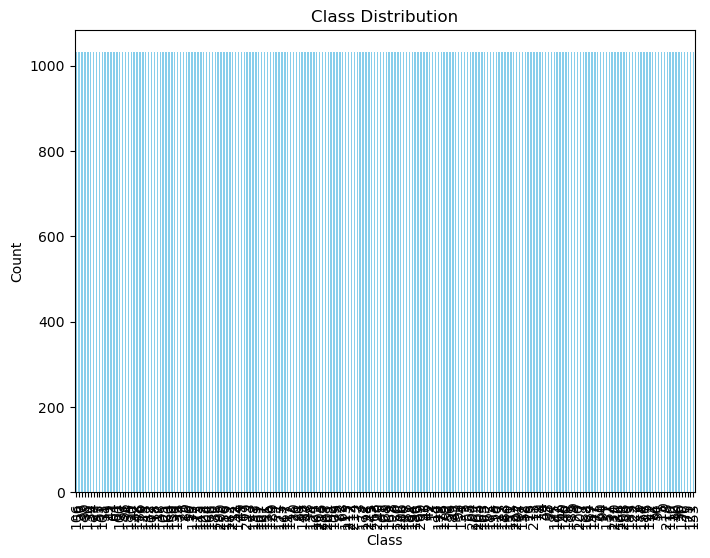

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [16]:
class_ratios = class_distribution / len(y) * 100
print(class_ratios)

106    7.129534
56     7.129534
37     7.129534
99     7.129534
196    7.129534
         ...   
120    7.129534
76     7.129534
75     7.129534
121    7.129534
153    7.129534
Length: 214, dtype: float64


In [17]:
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

In [23]:
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150,200]
}

In [24]:
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [26]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'n_estimators': 150}


In [27]:
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.6141623488773748


In [16]:
from sklearn.model_selection import StratifiedKFold

# Replace KFold with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [21]:
class_ratios = class_distribution / len(y) * 100
print(class_ratios)

205    8.780656
11     6.017271
106    5.533679
213    4.656304
16     4.221071
         ...   
28     0.006908
170    0.006908
149    0.006908
181    0.006908
117    0.006908
Length: 222, dtype: float64


In [22]:
pip install imbalanced-learn

     -------------------------------------- 257.7/257.7 kB 2.6 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.
